In [1]:
df_power = pd.read_csv("household_power_consumption_H.csv", header=None, skiprows=1).values[:, 1:].astype('float')

In [2]:
df_norm = np.copy(df_power)
for c in range(8):
    df_norm[:, c] -= df_power[:, c].min()
    df_norm[:, c] /= (df_power[:, c].max()-df_power[:, c].min())
print(df_norm.shape)

(34589, 8)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def window_reg(window_size):
    
    n_window = df_power.shape[0]-window_size+1
    X, Y = [], []

    for w in range(n_window - 1):
        X.append(df_power[w:w+window_size])
        Y.append(df_power[w+window_size, 0])
    X, Y = np.asarray(X), np.asarray(Y)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

    X_train_f, X_test_f = [], []
    for r in range(X_train.shape[0]):
        X_train_f.append(X_train[r].flatten())
    for r in range(X_test.shape[0]):
        X_test_f.append(X_test[r].flatten())
    X_train_f, X_test_f = np.asarray(X_train_f), np.asarray(X_test_f)   

    model = LinearRegression(fit_intercept=False)
    model = model.fit(X_train_f, Y_train)
    
    return model.score(X_train_f, Y_train), model.score(X_test_f, Y_test)


In [ ]:
df_norm = np.copy(df_power)
for c in range(8):
    df_norm[:, c] -= df_power[:, c].min()
    df_norm[:, c] /= (df_power[:, c].max()-df_power[:, c].min())
print(df_norm.shape)

window_size = 3
n_window = df_power.shape[0]-window_size+1
X, Y = [], []

for w in range(n_window - 1):
    X.append(df_norm[w:w+window_size])
    Y.append(df_norm[w+window_size, 0])
X, Y = np.asarray(X), np.asarray(Y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

X_train_f, X_test_f = [], []
for r in range(X_train.shape[0]):
    X_train_f.append(X_train[r].flatten())
for r in range(X_test.shape[0]):
    X_test_f.append(X_test[r].flatten())
X_train_f, X_test_f = np.asarray(X_train_f), np.asarray(X_test_f)



In [ ]:
logit_mod = sm.Logit(X_test_f, X_train_f)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

In [66]:
data = pd.Series([window_reg(x)[0] for x in range(150,180)], index = range(150,180))
data1 = pd.Series([window_reg(x)[1] for x in range(150,180)], index = range(150,180))

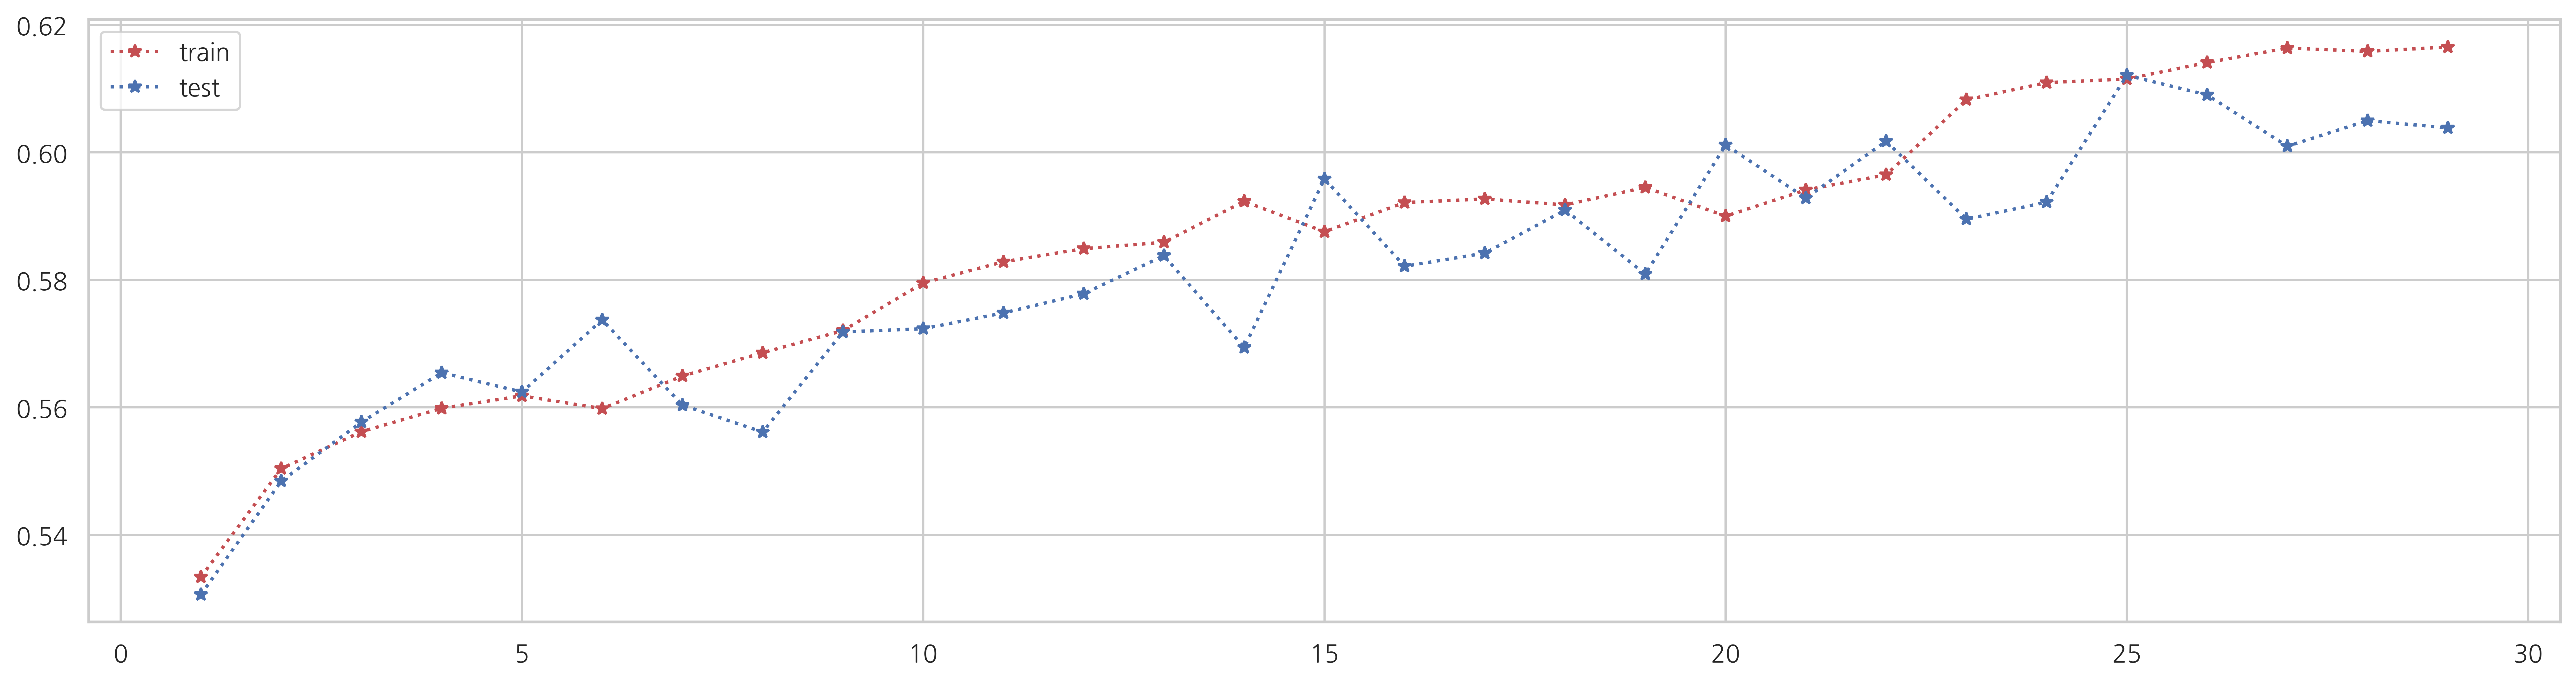

In [63]:
plt.figure(figsize=(20, 5))
plt.plot(data, "r*:", label="train")
plt.plot(data1, "b*:", label="test")
plt.legend(loc=0)
plt.show()

In [64]:
data = pd.Series([window_reg(x)[0] for x in range(1,30)], index = range(1,30))
data1 = pd.Series([window_reg(x)[1] for x in range(1,30)], index = range(1,30))

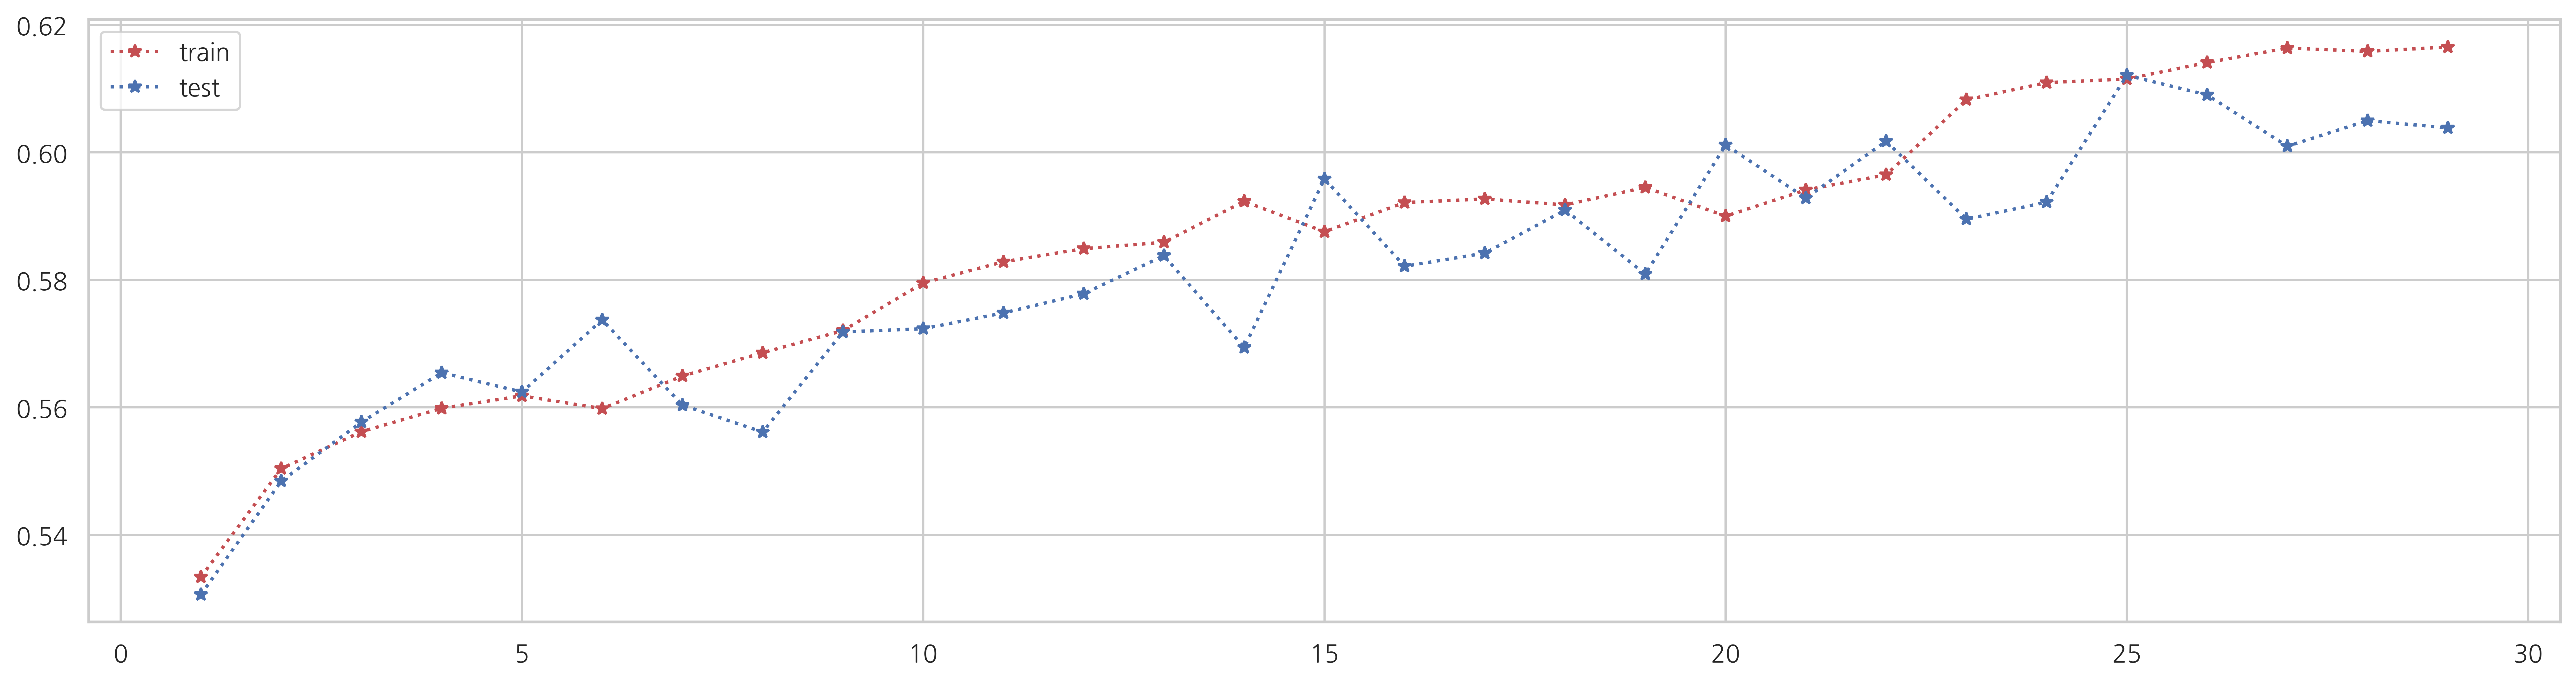

In [65]:
plt.figure(figsize=(20, 5))
plt.plot(data, "r*:", label="train")
plt.plot(data1, "b*:", label="test")
plt.legend(loc=0)
plt.show()

In [ ]:
data1 = pd.Series([window_reg(x)[1] for x in range(150,180)], index = range(150,180))

In [55]:
%%time
window_reg(1000)[0]

Wall time: 5min 25s


0.7516191467973601

In [56]:
%%time
window_reg(1000)[1]

Wall time: 5min 18s


0.4868746478821061

In [61]:
window_reg(300)[1]

0.598786981213155

In [62]:
window_reg(200)[1]

0.6022006634128781